# Лабораторная №8 Классификация изображений

## Часть 1 алгоритмы

## Задание 1
Напишите функцию, которая принимает полутоновое изображение произвольного размера и ядро свертки на вход, а на выходе выдает результат свертки

In [ ]:
import numpy as np

def convolve_grayscale(image, kernel):
    h, w = image.shape
    kh, kw = kernel.shape

    pad_h = kh // 2
    pad_w = kw // 2

    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    result = np.zeros_like(image)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kh, j:j+kw]
            result[i, j] = np.sum(region * kernel)

    return result

image = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

result = convolve_grayscale(image, kernel)
print("Результат свертки:")
print(result)

Результат свертки:
[[ -8  -4  -4  10]
 [-18  -6  -6  21]
 [-30  -6  -6  33]
 [-24  -4  -4  26]]


## Задание 2

Дополните функцию из задания 1 возможностью установить паддинг для обеспечения равных размерностей свертки и изображения и выполнить масштабирование входного изображения в диапазон (0,1).

In [ ]:
import numpy as np

def convolve_grayscale(image, kernel, padding=0, scale=False):
    if scale:
        image = image.astype(np.float64) / 255.0

    h, w = image.shape
    kh, kw = kernel.shape

    padded = np.pad(image, padding, mode='constant')
    result = np.zeros((h + 2*padding - kh + 1, w + 2*padding - kw + 1))

    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            region = padded[i:i+kh, j:j+kw]
            result[i, j] = np.sum(region * kernel)

    return result

image = np.array([
    [100, 150, 200, 50],
    [75, 180, 90, 210],
    [30, 120, 240, 80],
    [160, 40, 110, 220]
])

kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

result = convolve_grayscale(image, kernel, padding=1, scale=True)
print("Результат свертки:")
print(result)

Результат свертки:
[[-1.29411765 -0.45098039  0.2745098   1.1372549 ]
 [-1.76470588 -1.2745098   0.43137255  2.07843137]
 [-1.33333333 -0.68627451 -0.66666667  1.7254902 ]
 [-0.62745098 -0.62745098 -0.54901961  1.37254902]]


##Задание 3
Дополните функцию из задания 2 возможностью выполнить активацию результатов свертки с помощью ReLU или Sigmoid

In [ ]:
import numpy as np

def convolve_grayscale(image, kernel, padding=0, scale=False, activation=None):
    if scale:
        image = image.astype(np.float64) / 255.0

    h, w = image.shape
    kh, kw = kernel.shape

    padded = np.pad(image, padding, mode='constant')
    result = np.zeros((h + 2*padding - kh + 1, w + 2*padding - kw + 1))

    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            region = padded[i:i+kh, j:j+kw]
            result[i, j] = np.sum(region * kernel)

    if activation == 'relu':
        result = np.maximum(0, result)
    elif activation == 'sigmoid':
        result = 1 / (1 + np.exp(-result))

    return result

image = np.array([
    [100, 150, 200, 50],
    [75, 180, 90, 210],
    [30, 120, 240, 80],
    [160, 40, 110, 220]
])

kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

result_relu = convolve_grayscale(image, kernel, padding=1, scale=True, activation='relu')
result_sigmoid = convolve_grayscale(image, kernel, padding=1, scale=True, activation='sigmoid')

print("ReLU активация:")
print(result_relu)
print("\nSigmoid активация:")
print(result_sigmoid)

ReLU активация:
[[0.         0.         0.2745098  1.1372549 ]
 [0.         0.         0.43137255 2.07843137]
 [0.         0.         0.         1.7254902 ]
 [0.         0.         0.         1.37254902]]

Sigmoid активация:
[[0.21515667 0.38912769 0.56819972 0.75717528]
 [0.14620194 0.21848623 0.60620137 0.88878908]
 [0.20860853 0.33486234 0.33924363 0.84883466]
 [0.34808874 0.34808874 0.3660919  0.79779167]]


##Задание 4
Реализуйте функцию, которая на вход принимает результат свертки, размер ядра пулинга и тип пулинга (максимальный, минимальный, средний), а на выходе дает результат субдискретизации (пулинга) изображения

In [ ]:
import numpy as np

def pooling(input_map, pool_size, pool_type='max'):
    h, w = input_map.shape
    ph, pw = pool_size

    result_h = h // ph
    result_w = w // pw

    result = np.zeros((result_h, result_w))

    for i in range(result_h):
        for j in range(result_w):
            region = input_map[i*ph:(i+1)*ph, j*pw:(j+1)*pw]

            if pool_type == 'max':
                result[i, j] = np.max(region)
            elif pool_type == 'min':
                result[i, j] = np.min(region)
            elif pool_type == 'average':
                result[i, j] = np.mean(region)

    return result

conv_result = np.array([
    [1.2, 0.5, -0.3, 2.1],
    [0.8, -1.2, 1.5, -0.7],
    [2.3, 0.1, -0.9, 1.8],
    [-0.5, 1.7, 0.4, -1.1]
])

print("Максимальный пулинг:")
print(pooling(conv_result, (2, 2), 'max'))
print("\nСредний пулинг:")
print(pooling(conv_result, (2, 2), 'average'))
print("\nМинимальный пулинг:")
print(pooling(conv_result, (2, 2), 'min'))

Максимальный пулинг:
[[1.2 2.1]
 [2.3 1.8]]

Средний пулинг:
[[0.325 0.65 ]
 [0.9   0.05 ]]

Минимальный пулинг:
[[-1.2 -0.7]
 [-0.5 -1.1]]


##Часть 2 Система распознавания в TensorFlow

##Задание 1
Загрузите датасет CIFAR-10 (https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)





In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Размер тренировочных данных:", x_train.shape)
print("Размер тестовых данных:", x_test.shape)
print("Размер тренировочных меток:", y_train.shape)
print("Размер тестовых меток:", y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
Размер тренировочных данных: (50000, 32, 32, 3)
Размер тестовых данных: (10000, 32, 32, 3)
Размер тренировочных меток: (50000, 1)
Размер тестовых меток: (10000, 1)


##Задание 2
Визуализируйте несколько изображений из разных классов

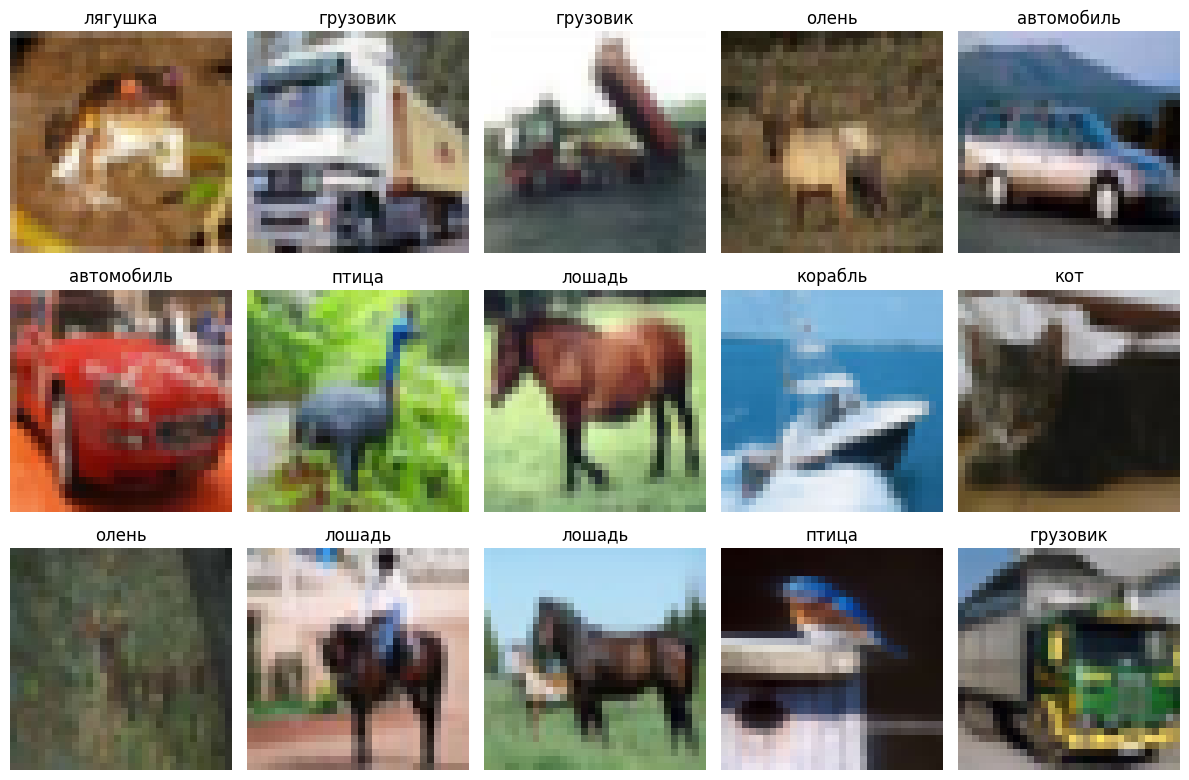

In [ ]:
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['самолет', 'автомобиль', 'птица', 'кот', 'олень',
               'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

plt.figure(figsize=(12, 8))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')

plt.tight_layout()
plt.show()

##Задание 3

Сравните объемы обучающих и тестовых данных

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Обучающая выборка:")
print("Изображения:", x_train.shape)
print("Метки:", y_train.shape)
print("Количество изображений:", x_train.shape[0])

print("\nТестовая выборка:")
print("Изображения:", x_test.shape)
print("Метки:", y_test.shape)
print("Количество изображений:", x_test.shape[0])

print(f"\nСоотношение train/test: {x_train.shape[0] / x_test.shape[0]:.1f}:1")
print(f"Train: {x_train.shape[0] / (x_train.shape[0] + x_test.shape[0]) * 100:.1f}%")
print(f"Test: {x_test.shape[0] / (x_train.shape[0] + x_test.shape[0]) * 100:.1f}%")

Обучающая выборка:
Изображения: (50000, 32, 32, 3)
Метки: (50000, 1)
Количество изображений: 50000

Тестовая выборка:
Изображения: (10000, 32, 32, 3)
Метки: (10000, 1)
Количество изображений: 10000

Соотношение train/test: 5.0:1
Train: 83.3%
Test: 16.7%


##Задание 4
Реализуйте обучение и оценку (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) простой модели машинного обучения из библиотеки ScikitLearn, например, классификатора на базе опорных векторов (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
from tensorflow.keras.datasets import cifar10
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

y_train_flat = y_train.ravel()
y_test_flat = y_test.ravel()

svm_model = SVC(kernel='linear', random_state=42)

svm_model.fit(x_train_flat[:5000], y_train_flat[:5000])

y_pred = svm_model.predict(x_test_flat[:1000])

print(classification_report(y_test_flat[:1000], y_pred,
                           target_names=['самолет', 'автомобиль', 'птица', 'кот', 'олень',
                                        'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']))

              precision    recall  f1-score   support

     самолет       0.31      0.38      0.34       103
  автомобиль       0.36      0.40      0.38        89
       птица       0.29      0.32      0.30       100
         кот       0.19      0.19      0.19       103
       олень       0.21      0.28      0.24        90
      собака       0.14      0.14      0.14        86
     лягушка       0.39      0.30      0.34       112
      лошадь       0.35      0.29      0.32       102
     корабль       0.42      0.44      0.43       106
    грузовик       0.41      0.27      0.32       109

    accuracy                           0.30      1000
   macro avg       0.31      0.30      0.30      1000
weighted avg       0.31      0.30      0.30      1000



##Задание 5
Используя фреймворк TensorFlow, постройте полносвязную ИНС (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) для классификации изображений CIFAR и обучите ее. Выполните оценку точности классификации.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

fcnn_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

fcnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

fcnn_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

test_loss, test_acc = fcnn_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2362 - loss: 2.1763 - val_accuracy: 0.3592 - val_loss: 1.7817
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3754 - loss: 1.7360 - val_accuracy: 0.3944 - val_loss: 1.7084
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4169 - loss: 1.6283 - val_accuracy: 0.3906 - val_loss: 1.7126
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4380 - loss: 1.5715 - val_accuracy: 0.4315 - val_loss: 1.5937
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4610 - loss: 1.4957 - val_accuracy: 0.4569 - val_loss: 1.5410
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4837 - loss: 1.4515 - val_accuracy: 0.4598 - val_loss: 1.5289
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5000 - loss: 1.4043 - val_accuracy: 0.4611 - val_loss: 1.5260
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4991 - loss: 1.3976 - val_accuracy: 0

##Задание 6
Используя фреймворк TensorFlow, постройте сверточную ИНС для классификации изображений CIFAR и обучите ее. Выполните оценку точности классификации.
Рекомендуется использовать сочетание слоев свертки (https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) и пулинга (https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPooling2D) до 5 штук, а также исследовать слои нормализации пакетов (https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization).

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3083 - loss: 1.9849 - val_accuracy: 0.5435 - val_loss: 1.2659
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5236 - loss: 1.3308 - val_accuracy: 0.6333 - val_loss: 1.0324
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6223 - loss: 1.0751 - val_accuracy: 0.6688 - val_loss: 0.9313
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6811 - loss: 0.9241 - val_accuracy: 0.7257 - val_loss: 0.7917
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7194 - loss: 0.8125 - val_accuracy: 0.7358 - val_loss: 0.7691
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7553 - loss: 0.7103 - val_accuracy: 0.7455 - val_loss: 0.7451
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7796 - loss: 0.6375 - val_accuracy: 0.7593 - val_loss: 0.7225
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8002 - loss: 0.5772 - val_accuracy:

##Задание 7
Визуализируйте несколько прогнозов разных моделей

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step


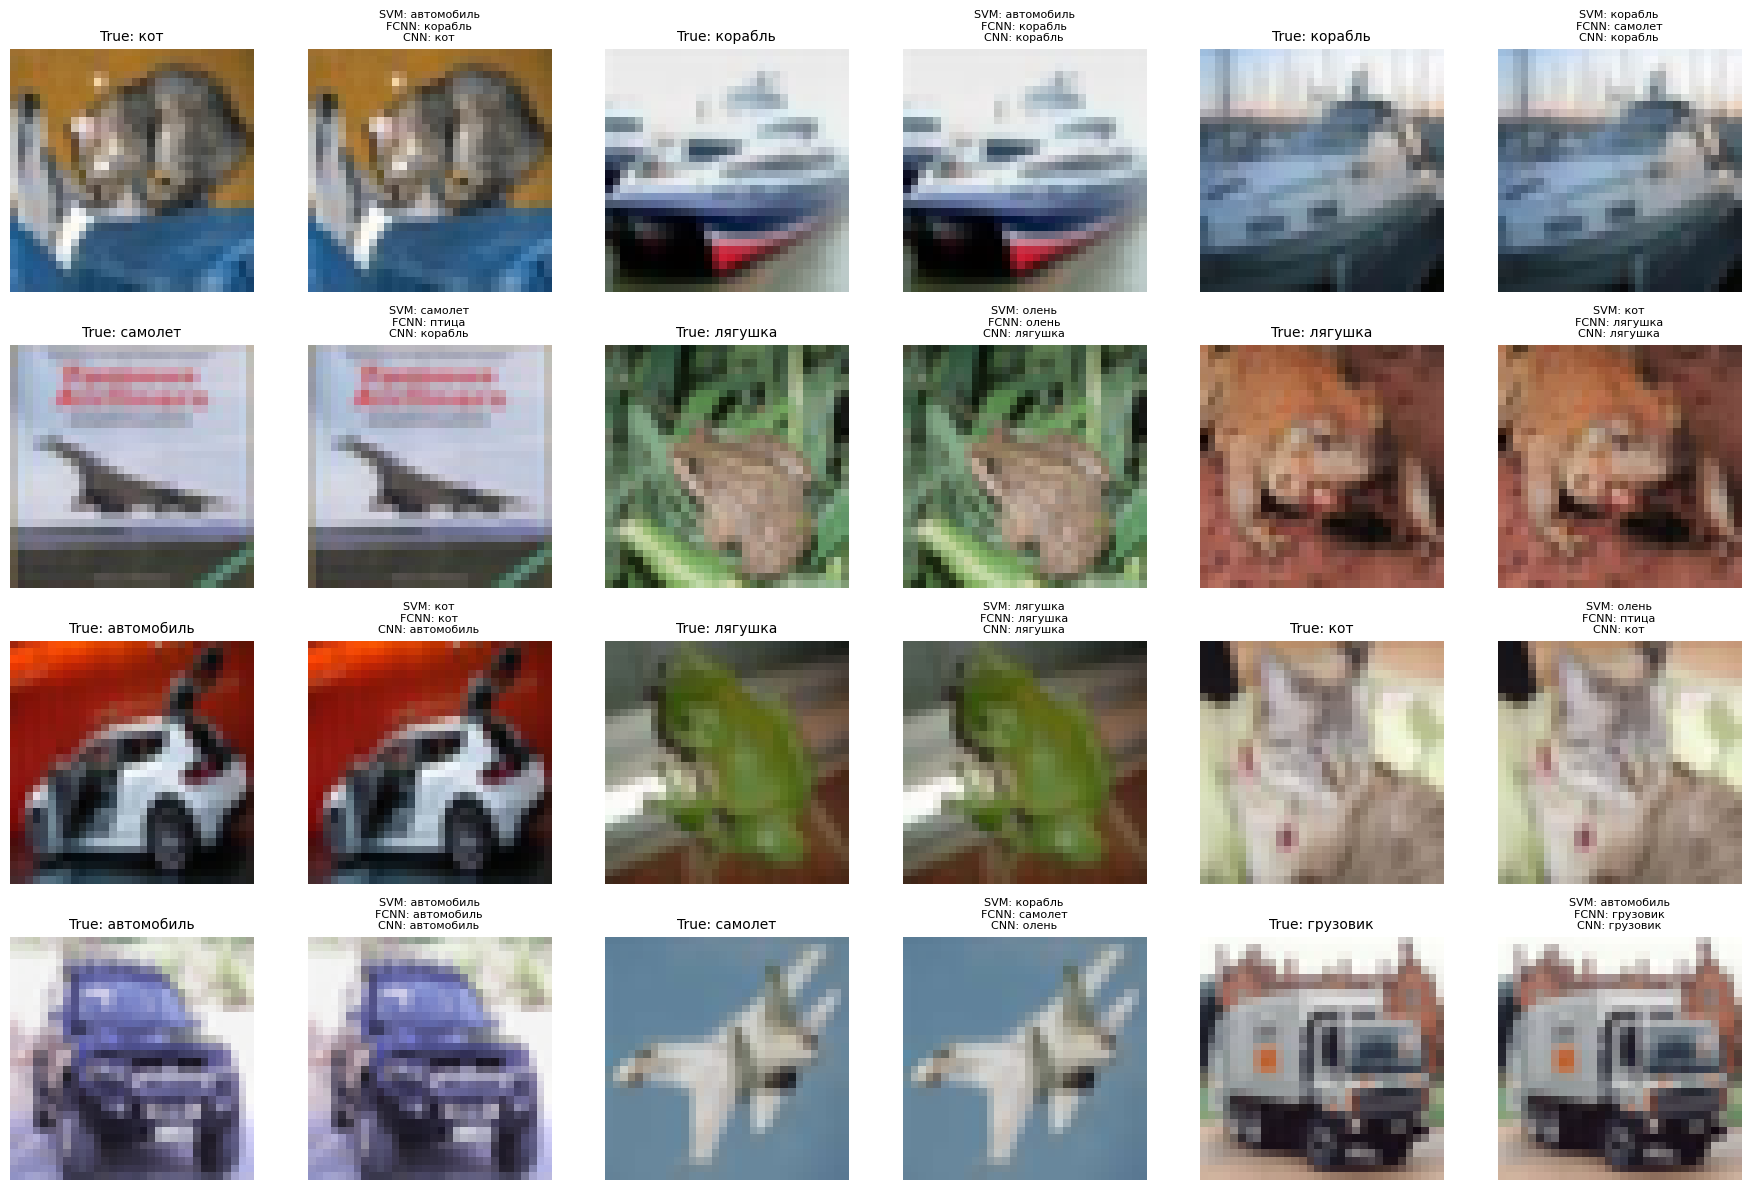

Сравнение прогнозов для первых 12 изображений:
Изображение 1: True=кот | SVM=автомобиль | FCNN=корабль | CNN=кот
Изображение 2: True=корабль | SVM=автомобиль | FCNN=корабль | CNN=корабль
Изображение 3: True=корабль | SVM=корабль | FCNN=самолет | CNN=корабль
Изображение 4: True=самолет | SVM=самолет | FCNN=птица | CNN=корабль
Изображение 5: True=лягушка | SVM=олень | FCNN=олень | CNN=лягушка
Изображение 6: True=лягушка | SVM=кот | FCNN=лягушка | CNN=лягушка
Изображение 7: True=автомобиль | SVM=кот | FCNN=кот | CNN=автомобиль
Изображение 8: True=лягушка | SVM=лягушка | FCNN=лягушка | CNN=лягушка
Изображение 9: True=кот | SVM=олень | FCNN=птица | CNN=кот
Изображение 10: True=автомобиль | SVM=автомобиль | FCNN=автомобиль | CNN=автомобиль
Изображение 11: True=самолет | SVM=корабль | FCNN=самолет | CNN=олень
Изображение 12: True=грузовик | SVM=автомобиль | FCNN=грузовик | CNN=грузовик


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_test_flat = x_test.reshape(x_test.shape[0], -1) / 255.0
x_test_norm = x_test.astype('float32') / 255
y_test_flat = y_test.ravel()

class_names = ['самолет', 'автомобиль', 'птица', 'кот', 'олень',
               'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

svm_pred = svm_model.predict(x_test_flat[:12])
fcnn_pred = fcnn_model.predict(x_test_norm[:12])
cnn_pred = cnn_model.predict(x_test_norm[:12])

plt.figure(figsize=(18, 12))
for i in range(12):
    plt.subplot(4, 6, i*2 + 1)
    plt.imshow(x_test[i])
    true_label = class_names[y_test[i][0]]
    plt.title(f'True: {true_label}', fontsize=10)
    plt.axis('off')

    plt.subplot(4, 6, i*2 + 2)
    plt.imshow(x_test[i])
    svm_label = class_names[svm_pred[i]]
    fcnn_label = class_names[np.argmax(fcnn_pred[i])]
    cnn_label = class_names[np.argmax(cnn_pred[i])]

    plt.title(f'SVM: {svm_label}\nFCNN: {fcnn_label}\nCNN: {cnn_label}',
              fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

print("Сравнение прогнозов для первых 12 изображений:")
print("=" * 50)
for i in range(12):
    true = class_names[y_test[i][0]]
    svm = class_names[svm_pred[i]]
    fcnn = class_names[np.argmax(fcnn_pred[i])]
    cnn = class_names[np.argmax(cnn_pred[i])]

    print(f"Изображение {i+1}: True={true} | SVM={svm} | FCNN={fcnn} | CNN={cnn}")

##Задание 8**
Обучите модель трансферного обучения, например, VGG-19 (https://www.kaggle.com/code/givkashi/transfer-learning-vgg19)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

def resize_images(images):
    return tf.image.resize(images, [48, 48])

x_train_resized = resize_images(x_train)
x_test_resized = resize_images(x_test)

x_train_preprocessed = tf.keras.applications.vgg19.preprocess_input(x_train_resized)
x_test_preprocessed = tf.keras.applications.vgg19.preprocess_input(x_test_resized)

base_model = VGG19(weights='imagenet',
                   include_top=False,
                   input_shape=(48, 48, 3))

base_model.trainable = False
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_preprocessed, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

test_loss, test_acc = model.compile(x_test_preprocessed, y_test)
print(f'Test accuracy VGG19: {test_acc:.4f}')

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.3918 - loss: 3.6975 - val_accuracy: 0.6035 - val_loss: 1.2159
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.5759 - loss: 1.2446 - val_accuracy: 0.6476 - val_loss: 1.0653
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.6234 - loss: 1.0993 - val_accuracy: 0.6669 - val_loss: 0.9845
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.6502 - loss: 1.0231 - val_accuracy: 0.6775 - val_loss: 0.9491
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6643 - loss: 0.9692 - val_accuracy: 0.6891 - val_loss: 0.9284
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6808 - loss: 0.9136 - val_accuracy: 0.6908 - val_loss: 0.9224
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.6963 - loss: 0.8802 - val_accuracy: 0.6946 - val_loss: 0.9040
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━

ValueError: Could not interpret optimizer identifier: [[[[-5.49390030e+01 -4.77899933e+00  3.43199997e+01]
   [-5.59390030e+01 -5.27899933e+00  3.48199997e+01]
   [-5.62723351e+01 -4.94566345e+00  3.63199997e+01]
   ...
   [-6.79390030e+01 -2.51123352e+01  4.15332794e+00]
   [-6.94390030e+01 -2.87789993e+01 -2.68000031e+00]
   [-7.09390030e+01 -3.17789993e+01 -7.68000031e+00]]

  [[-5.39390030e+01 -4.77899933e+00  3.13199997e+01]
   [-5.71890030e+01 -5.52899933e+00  3.13199997e+01]
   [-5.96890030e+01 -5.52899933e+00  3.24866562e+01]
   ...
   [-7.00223389e+01 -2.51123352e+01  3.65332794e+00]
   [-7.01890030e+01 -2.80289993e+01 -2.18000031e+00]
   [-7.04390030e+01 -3.02789993e+01 -6.18000031e+00]]

  [[-5.36056709e+01 -5.11233521e+00  2.81533279e+01]
   [-5.93556709e+01 -6.02899933e+00  2.77366714e+01]
   [-6.43278961e+01 -6.33455658e+00  2.86255569e+01]
   ...
   [-7.17445526e+01 -2.44734421e+01  3.93110657e+00]
   [-7.08556671e+01 -2.68623352e+01 -1.18000031e+00]
   [-7.01056671e+01 -2.86123352e+01 -4.51333618e+00]]

  ...

  [[ 6.55609970e+01  5.54328918e-01 -6.15133362e+01]
   [ 5.48109970e+01 -7.27899933e+00 -6.86800003e+01]
   [ 4.15332108e+01 -1.78067780e+01 -7.80966644e+01]
   ...
   [ 2.06721115e+01 -3.68623276e+01 -9.70688782e+01]
   [ 1.27276611e+01 -4.35289993e+01 -9.88466644e+01]
   [ 6.39431763e+00 -4.92790146e+01 -1.00346680e+02]]

  [[ 6.00609970e+01 -5.27899933e+00 -6.61800003e+01]
   [ 5.23109970e+01 -9.27899933e+00 -6.86800003e+01]
   [ 4.18109970e+01 -1.60289993e+01 -7.32633362e+01]
   ...
   [ 2.34776688e+01 -3.43623276e+01 -9.32633286e+01]
   [ 1.40609970e+01 -4.25289993e+01 -9.76800003e+01]
   [ 4.56099701e+00 -5.12789993e+01 -1.03180000e+02]]

  [[ 5.60609970e+01 -9.77899933e+00 -6.96800003e+01]
   [ 5.05609970e+01 -1.07789993e+01 -6.86800003e+01]
   [ 4.22276688e+01 -1.44456711e+01 -6.95133362e+01]
   ...
   [ 2.42276688e+01 -3.39456635e+01 -9.13466644e+01]
   [ 1.55609970e+01 -4.12789993e+01 -9.61800003e+01]
   [ 6.06099701e+00 -4.97789993e+01 -1.02680000e+02]]]


 [[[ 1.31061005e+02  1.18221001e+02  1.11320000e+02]
   [ 1.29061005e+02  1.16221001e+02  1.09320000e+02]
   [ 1.27227669e+02  1.14387672e+02  1.07486671e+02]
   ...
   [ 1.29061005e+02  1.16221001e+02  1.09320000e+02]
   [ 1.28561005e+02  1.15721001e+02  1.08820000e+02]
   [ 1.28061005e+02  1.15221001e+02  1.08320000e+02]]

  [[ 1.32561005e+02  1.19721001e+02  1.12820000e+02]
   [ 1.30811005e+02  1.17971001e+02  1.11070000e+02]
   [ 1.29144348e+02  1.16304344e+02  1.09403343e+02]
   ...
   [ 1.30561005e+02  1.17721001e+02  1.10820000e+02]
   [ 1.30061005e+02  1.17221001e+02  1.10320000e+02]
   [ 1.29561005e+02  1.16721001e+02  1.09820000e+02]]

  [[ 1.33894318e+02  1.21054329e+02  1.14153328e+02]
   [ 1.32394318e+02  1.19554329e+02  1.12653328e+02]
   [ 1.30894318e+02  1.18054329e+02  1.11153328e+02]
   ...
   [ 1.31894318e+02  1.19054329e+02  1.12153328e+02]
   [ 1.31394318e+02  1.18554329e+02  1.11653328e+02]
   [ 1.30894318e+02  1.18054329e+02  1.11153328e+02]]

  ...

  [[-2.07723389e+01 -2.02789993e+01 -4.08466721e+01]
   [-4.42723389e+01 -4.05289993e+01 -5.95133362e+01]
   [-7.04390030e+01 -6.33623276e+01 -8.02355499e+01]
   ...
   [ 8.93665695e+01  8.08321152e+01  5.89311142e+01]
   [ 9.38943253e+01  8.39710007e+01  6.21533279e+01]
   [ 9.62276688e+01  8.52210007e+01  6.34866714e+01]]

  [[-2.14390030e+01 -1.82789993e+01 -4.01800003e+01]
   [-4.16890030e+01 -3.45289993e+01 -5.49300003e+01]
   [-6.39390030e+01 -5.25289993e+01 -7.08466644e+01]
   ...
   [ 8.73943405e+01  7.88043442e+01  5.69033432e+01]
   [ 9.25609970e+01  8.24710007e+01  6.08199997e+01]
   [ 9.55609970e+01  8.42210007e+01  6.28199997e+01]]

  [[-2.09390030e+01 -1.57789993e+01 -3.86800003e+01]
   [-3.84390030e+01 -2.87789993e+01 -5.01800003e+01]
   [-5.76056709e+01 -4.31123352e+01 -6.23466682e+01]
   ...
   [ 8.48943405e+01  7.62210007e+01  5.43199997e+01]
   [ 9.10609970e+01  8.07210007e+01  5.93199997e+01]
   [ 9.50609970e+01  8.32210007e+01  6.23199997e+01]]]


 [[[ 1.18060997e+02  7.32210007e+01  3.43199997e+01]
   [ 1.16060997e+02  7.17210007e+01  3.43199997e+01]
   [ 1.10060997e+02  6.67210007e+01  3.11533279e+01]
   ...
   [ 1.37561005e+02  1.20887672e+02  1.11820000e+02]
   [ 1.40561005e+02  1.23221001e+02  1.13820000e+02]
   [ 1.42061005e+02  1.24221001e+02  1.14320000e+02]]

  [[ 1.21560997e+02  7.82210007e+01  4.03199997e+01]
   [ 1.19810997e+02  7.72210007e+01  4.08199997e+01]
   [ 1.13977654e+02  7.25543442e+01  3.79866562e+01]
   ...
   [ 1.40644348e+02  1.23887672e+02  1.15903343e+02]
   [ 1.43561005e+02  1.26471001e+02  1.18070000e+02]
   [ 1.44561005e+02  1.27221001e+02  1.18320000e+02]]

  [[ 1.24394325e+02  8.33876724e+01  4.69866714e+01]
   [ 1.22894325e+02  8.28876724e+01  4.79866714e+01]
   [ 1.17283211e+02  7.86099014e+01  4.55422287e+01]
   ...
   [ 1.43755463e+02  1.27221016e+02  1.20486671e+02]
   [ 1.46311005e+02  1.29721008e+02  1.22570000e+02]
   [ 1.46394318e+02  1.29721008e+02  1.22153328e+02]]

  ...

  [[-6.39390068e+01 -8.17790070e+01 -9.93466721e+01]
   [-6.23556709e+01 -8.01956635e+01 -9.77633362e+01]
   [-6.11612244e+01 -7.90012207e+01 -9.65688934e+01]
   ...
   [-9.53001404e+01 -1.06917908e+02 -1.15985573e+02]
   [-9.98556747e+01 -1.09695671e+02 -1.18846664e+02]
   [-1.00605667e+02 -1.09778999e+02 -1.18846664e+02]]

  [[-6.09390030e+01 -7.92789993e+01 -9.81800003e+01]
   [-5.91890030e+01 -7.77789993e+01 -9.66800003e+01]
   [-5.74390030e+01 -7.62789993e+01 -9.51800003e+01]
   ...
   [-9.87723465e+01 -1.10029007e+02 -1.18346672e+02]
   [-9.99390030e+01 -1.10278999e+02 -1.18680000e+02]
   [-9.89390030e+01 -1.09278999e+02 -1.17680000e+02]]

  [[-5.69390030e+01 -7.57789993e+01 -9.56800003e+01]
   [-5.54390030e+01 -7.47789993e+01 -9.46800003e+01]
   [-5.36056709e+01 -7.34456635e+01 -9.33466644e+01]
   ...
   [-1.00105675e+02 -1.11612335e+02 -1.19513336e+02]
   [-9.89390030e+01 -1.10278999e+02 -1.18180000e+02]
   [-9.69390030e+01 -1.08778999e+02 -1.16680000e+02]]]


 ...


 [[[-9.19390030e+01 -1.01778999e+02 -1.03680000e+02]
   [-9.24390030e+01 -1.02278999e+02 -1.04180000e+02]
   [-9.29390030e+01 -1.02778999e+02 -1.05346664e+02]
   ...
   [-9.52723389e+01 -1.06112335e+02 -1.12013336e+02]
   [-9.44390030e+01 -1.05278999e+02 -1.11180000e+02]
   [-9.39390030e+01 -1.04778999e+02 -1.10680000e+02]]

  [[-9.14390030e+01 -1.01278999e+02 -1.03180000e+02]
   [-9.16890030e+01 -1.01528999e+02 -1.03680000e+02]
   [-9.20223389e+01 -1.01695663e+02 -1.04680000e+02]
   ...
   [-9.61056671e+01 -1.06945663e+02 -1.12846664e+02]
   [-9.51890030e+01 -1.06028999e+02 -1.11930000e+02]
   [-9.44390030e+01 -1.05278999e+02 -1.11180000e+02]]

  [[-9.09390030e+01 -1.00778999e+02 -1.02680000e+02]
   [-9.10223389e+01 -1.00695663e+02 -1.03096664e+02]
   [-9.12723389e+01 -1.00445663e+02 -1.03818893e+02]
   ...
   [-9.66056671e+01 -1.07445663e+02 -1.13346664e+02]
   [-9.56890030e+01 -1.06528999e+02 -1.12430000e+02]
   [-9.47723389e+01 -1.05612335e+02 -1.11513336e+02]]

  ...

  [[-9.01056671e+01 -9.17789993e+01 -9.06800003e+01]
   [-8.95223389e+01 -9.12789993e+01 -9.01800003e+01]
   [-8.89390030e+01 -9.07789993e+01 -8.96800003e+01]
   ...
   [-4.83278885e+01 -9.26123352e+01 -9.63744431e+01]
   [-5.26890030e+01 -9.38623352e+01 -9.76800003e+01]
   [-5.77723312e+01 -9.51123352e+01 -9.90133362e+01]]

  [[-9.09390030e+01 -9.27789993e+01 -9.16800003e+01]
   [-9.04390030e+01 -9.22789993e+01 -9.11800003e+01]
   [-8.98556671e+01 -9.16956635e+01 -9.05966644e+01]
   ...
   [-5.00223351e+01 -9.32789993e+01 -9.73466644e+01]
   [-5.31890030e+01 -9.45289993e+01 -9.79300003e+01]
   [-5.69390030e+01 -9.57789993e+01 -9.86800003e+01]]

  [[-9.19390030e+01 -9.37789993e+01 -9.26800003e+01]
   [-9.14390030e+01 -9.32789993e+01 -9.21800003e+01]
   [-9.07723389e+01 -9.26123352e+01 -9.15133362e+01]
   ...
   [-5.14390030e+01 -9.37789993e+01 -9.80133362e+01]
   [-5.39390030e+01 -9.52789993e+01 -9.81800003e+01]
   [-5.69390030e+01 -9.67789993e+01 -9.86800003e+01]]]


 [[[-9.19390030e+01 -7.67789993e+01 -9.86800003e+01]
   [-9.64390030e+01 -7.87789993e+01 -1.03680000e+02]
   [-9.84390030e+01 -7.99456635e+01 -1.07346664e+02]
   ...
   [ 2.39435577e+00 -8.94564819e+00 -3.68466492e+01]
   [-1.93900299e+00 -1.57789993e+01 -4.01800003e+01]
   [-1.19390030e+01 -2.77789993e+01 -4.86800003e+01]]

  [[-9.49390030e+01 -8.42789993e+01 -1.05180000e+02]
   [-9.69390030e+01 -8.22789993e+01 -1.05680000e+02]
   [-9.70223389e+01 -7.99456635e+01 -1.05180000e+02]
   ...
   [ 3.44776840e+01  1.83043594e+01 -8.59664154e+00]
   [ 2.40609970e+01  4.97100067e+00 -1.86800003e+01]
   [ 7.56099701e+00 -1.37789993e+01 -3.41800003e+01]]

  [[-9.71056671e+01 -9.17789993e+01 -1.11680000e+02]
   [-9.71056671e+01 -8.64456635e+01 -1.08096664e+02]
   [-9.54945602e+01 -8.09456635e+01 -1.03430000e+02]
   ...
   [ 6.98665848e+01  4.75821304e+01  2.18478012e+01]
   [ 5.29776688e+01  2.73043289e+01  4.48667145e+00]
   [ 3.03943253e+01  2.22100067e+00 -1.76800003e+01]]

  ...

  [[-2.12723312e+01  1.47210007e+01 -2.11800003e+01]
   [-2.10223389e+01  1.45543289e+01 -2.05133286e+01]
   [-2.01612244e+01  1.49987869e+01 -1.94022217e+01]
   ...
   [-1.95223389e+01  1.08043289e+01 -2.45966721e+01]
   [-2.24390030e+01  7.13766479e+00 -2.83466644e+01]
   [-2.49390030e+01  4.22100067e+00 -3.18466644e+01]]

  [[-2.34390030e+01  1.22210007e+01 -2.46800003e+01]
   [-2.39390030e+01  1.12210007e+01 -2.44300003e+01]
   [-2.36890030e+01  1.09710007e+01 -2.34300003e+01]
   ...
   [-2.12723312e+01  8.72100067e+00 -2.66800003e+01]
   [-2.29390030e+01  5.97100067e+00 -2.91800003e+01]
   [-2.44390030e+01  3.72100067e+00 -3.16800003e+01]]

  [[-2.59390030e+01  9.22100067e+00 -2.86800003e+01]
   [-2.69390030e+01  7.72100067e+00 -2.86800003e+01]
   [-2.71056671e+01  7.05433655e+00 -2.76800003e+01]
   ...
   [-2.31056671e+01  6.38766479e+00 -2.90133286e+01]
   [-2.34390030e+01  4.72100067e+00 -3.01800003e+01]
   [-2.39390030e+01  3.22100067e+00 -3.16800003e+01]]]


 [[[-2.89390030e+01 -3.87789993e+01 -5.06800003e+01]
   [-9.93900299e+00 -2.62789993e+01 -3.81800003e+01]
   [ 9.22766113e+00 -1.32789993e+01 -2.55133362e+01]
   ...
   [ 4.97276688e+01  3.23876724e+01  1.13199997e+01]
   [ 8.45609970e+01  6.52210007e+01  4.53199997e+01]
   [ 1.19060997e+02  9.82210007e+01  7.93199997e+01]]

  [[-3.14390030e+01 -4.12789993e+01 -5.26800003e+01]
   [-1.51890030e+01 -3.10289993e+01 -4.26800003e+01]
   [-1.89002991e-01 -2.16956711e+01 -3.39300003e+01]
   ...
   [ 1.36443253e+01 -1.12335205e-01 -1.95133362e+01]
   [ 4.40609970e+01  2.79710007e+01  8.56999969e+00]
   [ 7.50609970e+01  5.72210007e+01  3.78199997e+01]]

  [[-3.39390030e+01 -4.37789993e+01 -5.46800003e+01]
   [-2.01890030e+01 -3.52789993e+01 -4.66800003e+01]
   [-9.38345337e+00 -2.93901138e+01 -4.16800079e+01]
   ...
   [-2.65779037e+01 -3.57790146e+01 -5.31522293e+01]
   [-4.10567474e+00 -1.58623352e+01 -3.45133362e+01]
   [ 2.00609894e+01  6.38766479e+00 -1.33466721e+01]]

  ...

  [[-1.21056747e+01  5.38766479e+00 -7.34667206e+00]
   [-9.93900299e+00  6.97099304e+00 -3.26333618e+00]
   [-7.27234650e+00  8.72100067e+00  1.56999207e+00]
   ...
   [-3.98279114e+01 -4.42234726e+01 -5.02633591e+01]
   [-6.11890030e+01 -7.11956635e+01 -7.75133362e+01]
   [-7.67723389e+01 -8.97789993e+01 -9.66800003e+01]]

  [[-1.34390030e+01  3.72100067e+00 -8.18000031e+00]
   [-1.14390030e+01  4.97100067e+00 -4.93000031e+00]
   [-8.52233887e+00  6.88767242e+00 -5.13328552e-01]
   ...
   [-3.95223618e+01 -4.33623657e+01 -4.85967026e+01]
   [-6.14390030e+01 -7.10289993e+01 -7.66800003e+01]
   [-7.74390030e+01 -9.02789993e+01 -9.66800003e+01]]

  [[-1.39390030e+01  3.22100067e+00 -7.68000031e+00]
   [-1.19390030e+01  4.22100067e+00 -5.18000031e+00]
   [-8.77233887e+00  6.22100067e+00 -1.34666443e+00]
   ...
   [-3.99390259e+01 -4.34457016e+01 -4.76800308e+01]
   [-6.19390030e+01 -7.12789993e+01 -7.61800003e+01]
   [-7.79390030e+01 -9.07789993e+01 -9.66800003e+01]]]]

##Часть 3 Классификация изображений в PyTorch

##Задание 1
Используя фреймворк PyTorch (https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html) реализуйте полносвязную ИНС для классификации CIFAR-10. Выполните оценку точности модели после ее обучения.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=False)

class FCNN(nn.Module):
    def __init__(self):
        super(FCNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32*32*3, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

fc_model = FCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(fc_model.parameters(), lr=0.001)

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = fc_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = fc_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

100%|██████████| 170M/170M [00:14<00:00, 11.8MB/s]


Epoch 1, Loss: 1.7905
Epoch 2, Loss: 1.6395
Epoch 3, Loss: 1.5760
Epoch 4, Loss: 1.5327
Epoch 5, Loss: 1.5000
Epoch 6, Loss: 1.4691
Epoch 7, Loss: 1.4399
Epoch 8, Loss: 1.4205
Epoch 9, Loss: 1.3990
Epoch 10, Loss: 1.3769
Test Accuracy: 48.44%


##Задание 2
Используя фреймворк PyTorch (https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html) реализуйте сверточную ИНС с пулингом для классификации CIFAR-10. Настройте слои нормализации и регуляризации DropOut. Выполните оценку точности модели после ее обучения.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)

        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.dropout2 = nn.Dropout(0.25)

        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.dropout3 = nn.Dropout(0.25)

        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout_fc = nn.Dropout(0.5)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout1(x)

        x = self.relu(self.bn3(self.conv3(x)))
        x = self.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = self.dropout2(x)

        x = self.relu(self.bn5(self.conv5(x)))
        x = self.pool(x)
        x = self.dropout3(x)

        x = x.view(-1, 128 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.dropout_fc(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

cnn_model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = cnn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Epoch 1, Loss: 1.5036
Epoch 2, Loss: 1.1123
Epoch 3, Loss: 0.9529
Epoch 4, Loss: 0.8684
Epoch 5, Loss: 0.8028
Epoch 6, Loss: 0.7580
Epoch 7, Loss: 0.7204
Epoch 8, Loss: 0.6867
Epoch 9, Loss: 0.6543
Epoch 10, Loss: 0.6372
Epoch 11, Loss: 0.6113
Epoch 12, Loss: 0.5900
Epoch 13, Loss: 0.5736
Epoch 14, Loss: 0.5532
Epoch 15, Loss: 0.5401
Epoch 16, Loss: 0.5219
Epoch 17, Loss: 0.5107
Epoch 18, Loss: 0.4987
Epoch 19, Loss: 0.4848
Epoch 20, Loss: 0.4733
Test Accuracy: 79.42%


##Задание 3
Выведите несколько изображений и прогнозных лейблов для разных моделей.

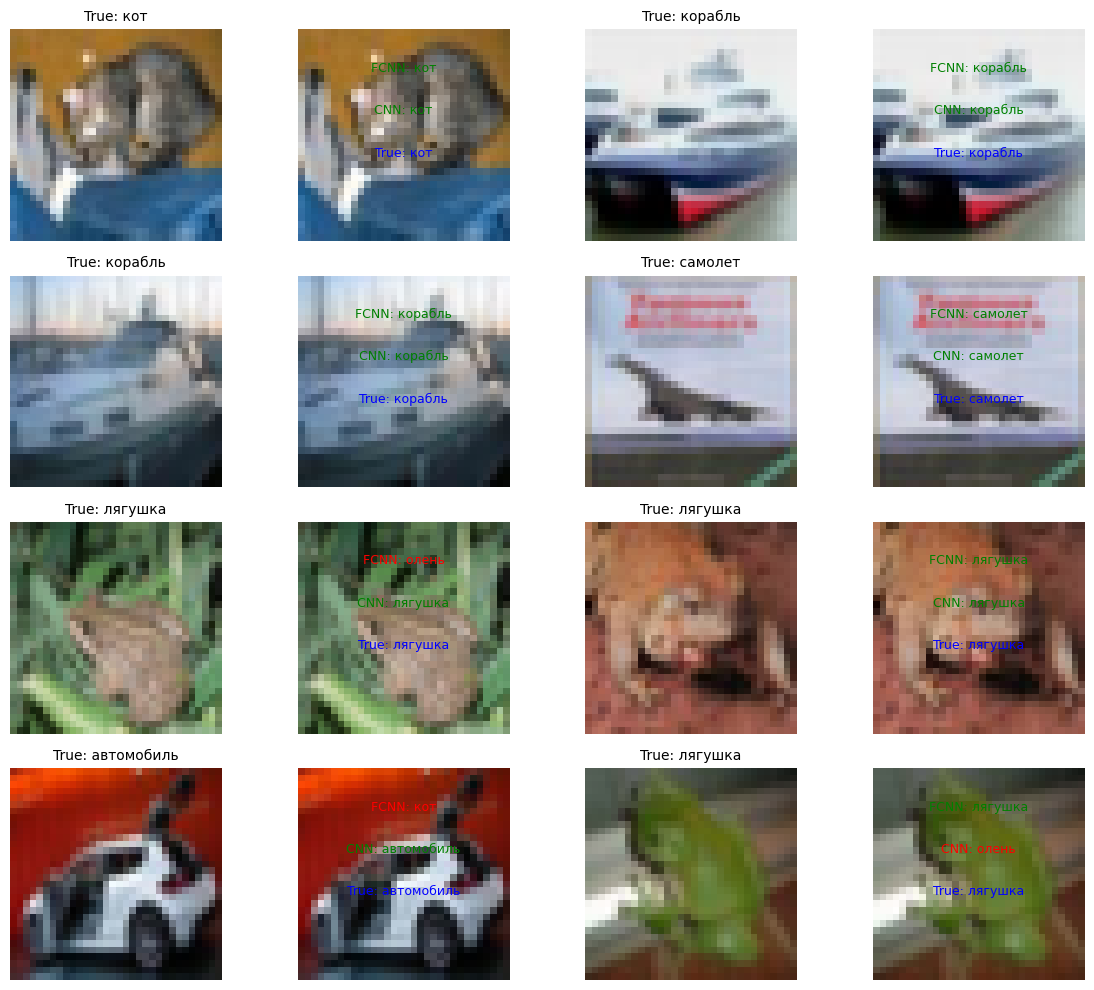

Статистика для первых 8 изображений:
Правильные прогнозы FCNN: 6/8
Правильные прогнозы CNN: 7/8

Детальные прогнозы:
Изображение 1: True=кот        | FCNN=кот        | CNN=кот       
Изображение 2: True=корабль    | FCNN=корабль    | CNN=корабль   
Изображение 3: True=корабль    | FCNN=корабль    | CNN=корабль   
Изображение 4: True=самолет    | FCNN=самолет    | CNN=самолет   
Изображение 5: True=лягушка    | FCNN=олень      | CNN=лягушка   
Изображение 6: True=лягушка    | FCNN=лягушка    | CNN=лягушка   
Изображение 7: True=автомобиль | FCNN=кот        | CNN=автомобиль
Изображение 8: True=лягушка    | FCNN=лягушка    | CNN=олень     


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('самолет', 'автомобиль', 'птица', 'кот', 'олень',
           'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик')

dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

fc_model.eval()
cnn_model.eval()

with torch.no_grad():
    fc_outputs = fc_model(images[:8])
    cnn_outputs = cnn_model(images[:8])

_, fc_preds = torch.max(fc_outputs, 1)
_, cnn_preds = torch.max(cnn_outputs, 1)

fig, axes = plt.subplots(4, 4, figsize=(12, 10))
for i in range(8):
    ax = axes[i//2, (i%2)*2]
    img = images[i] / 2 + 0.5
    img = img.cpu().numpy().transpose((1, 2, 0))
    ax.imshow(img)
    true_label = classes[labels[i]]
    ax.set_title(f'True: {true_label}', fontsize=10)
    ax.axis('off')

    ax = axes[i//2, (i%2)*2 + 1]
    ax.imshow(img)
    fc_label = classes[fc_preds[i]]
    cnn_label = classes[cnn_preds[i]]

    fc_color = 'green' if fc_preds[i] == labels[i] else 'red'
    cnn_color = 'green' if cnn_preds[i] == labels[i] else 'red'

    ax.text(0.5, 0.8, f'FCNN: {fc_label}', transform=ax.transAxes,
            fontsize=9, color=fc_color, ha='center')
    ax.text(0.5, 0.6, f'CNN: {cnn_label}', transform=ax.transAxes,
            fontsize=9, color=cnn_color, ha='center')
    ax.text(0.5, 0.4, f'True: {true_label}', transform=ax.transAxes,
            fontsize=9, color='blue', ha='center')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("Статистика для первых 8 изображений:")
print("=" * 50)
fc_correct = (fc_preds == labels[:8]).sum().item()
cnn_correct = (cnn_preds == labels[:8]).sum().item()

print(f"Правильные прогнозы FCNN: {fc_correct}/8")
print(f"Правильные прогнозы CNN: {cnn_correct}/8")

print("\nДетальные прогнозы:")
print("=" * 50)
for i in range(8):
    true_label = classes[labels[i]]
    fc_label = classes[fc_preds[i]]
    cnn_label = classes[cnn_preds[i]]


    print(f"Изображение {i+1}: True={true_label:10} | FCNN={fc_label:10} | CNN={cnn_label:10}")

##Задание 4*
Выполните трансферное обучение в фреймворке PyTorch, например, для сети ResNet18 (https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html). Выполните оценку качества модели

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import transforms, models
import time
import copy

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)

trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=False)

res_net_18_model = models.resnet18(weights='IMAGENET1K_V1')

for param in res_net_18_model.parameters():
    param.requires_grad = False

num_features = res_net_18_model.fc.in_features
res_net_18_model.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(512, 10)
)

res_net_18_model = res_net_18_model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(res_net_18_model.fc.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

def train_model(model, criterion, optimizer, scheduler, num_epochs=15):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
                dataloader = trainloader
            else:
                model.eval()
                dataloader = testloader

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    model.load_state_dict(best_model_wts)
    return model

model = train_model(res_net_18_model, criterion, optimizer, scheduler, num_epochs=15)

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Final Test Accuracy of ResNet18: {100 * correct / total:.2f}%')

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 137MB/s]


Epoch 0/14
----------
train Loss: 1.9693 Acc: 0.2939
val Loss: 1.7925 Acc: 0.3801

Epoch 1/14
----------
train Loss: 1.8878 Acc: 0.3263
val Loss: 1.7761 Acc: 0.3805

Epoch 2/14
----------
train Loss: 1.8676 Acc: 0.3374
val Loss: 1.7640 Acc: 0.3930

Epoch 3/14
----------
train Loss: 1.8541 Acc: 0.3372
val Loss: 1.7605 Acc: 0.3902

Epoch 4/14
----------
train Loss: 1.8513 Acc: 0.3402
val Loss: 1.7520 Acc: 0.3961

Epoch 5/14
----------
train Loss: 1.8443 Acc: 0.3429
val Loss: 1.7563 Acc: 0.3920

Epoch 6/14
----------
train Loss: 1.8398 Acc: 0.3426
val Loss: 1.7556 Acc: 0.3895

Epoch 7/14
----------
train Loss: 1.8157 Acc: 0.3533
val Loss: 1.7174 Acc: 0.4095

Epoch 8/14
----------
train Loss: 1.8061 Acc: 0.3610
val Loss: 1.7136 Acc: 0.4146

Epoch 9/14
----------
train Loss: 1.8051 Acc: 0.3632
val Loss: 1.7071 Acc: 0.4152

Epoch 10/14
----------
train Loss: 1.7921 Acc: 0.3649
val Loss: 1.6908 Acc: 0.4215

Epoch 11/14
----------
train Loss: 1.7978 Acc: 0.3622
val Loss: 1.6951 Acc: 0.4182

Ep

##Задание 5
Для каждого класса найдите изображение в Интернете и для каждой обученной ранее модели выведите результаты предсказаний.

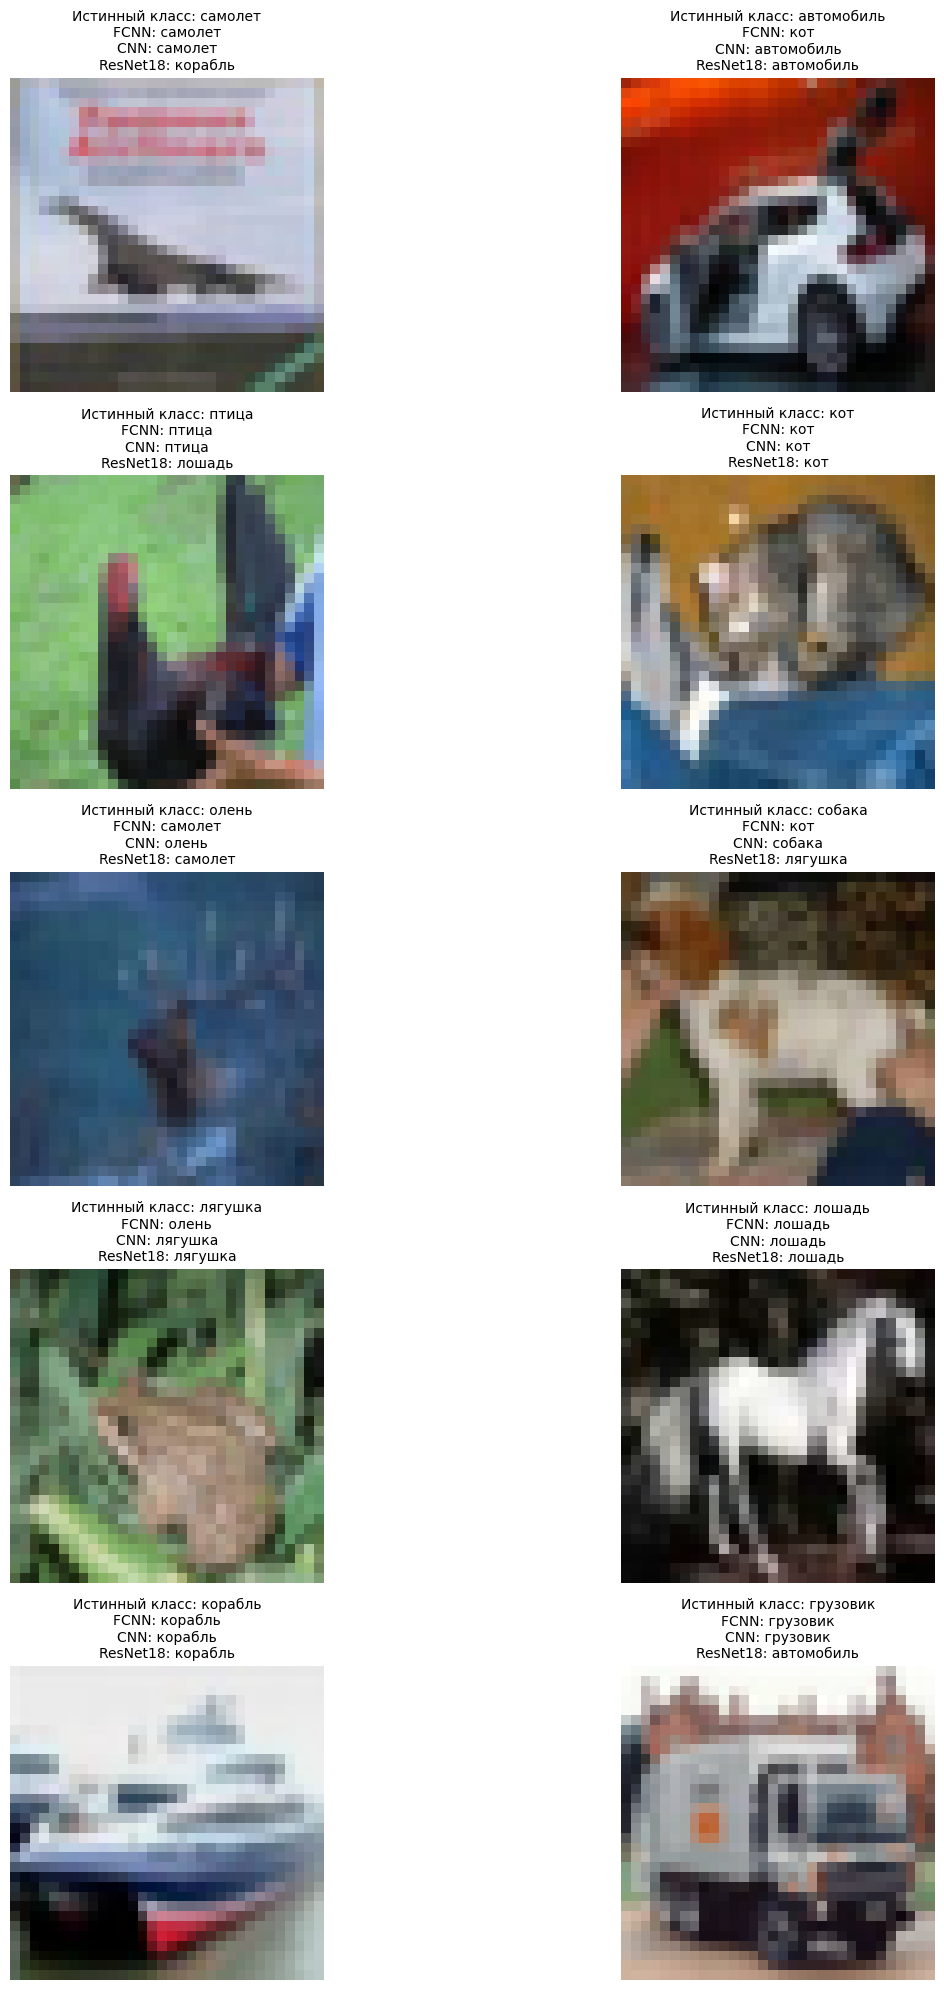

Детальная статистика предсказаний:
Класс        FCNN            CNN             ResNet18       
----------------------------------------------------------------------
самолет      самолет         самолет         корабль        
автомобиль   кот             автомобиль      автомобиль     
птица        птица           птица           лошадь         
кот          кот             кот             кот            
олень        самолет         олень           самолет        
собака       кот             собака          лягушка        
лягушка      олень           лягушка         лягушка        
лошадь       лошадь          лошадь          лошадь         
корабль      корабль         корабль         корабль        
грузовик     грузовик        грузовик        автомобиль     
----------------------------------------------------------------------
Итого        6/10            10/10            5/10
Точность     60%              100%              50%


In [ ]:
import requests
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from io import BytesIO

# Классы CIFAR-10
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень',
           'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

# Локальные пути к изображениям или альтернативные URL
image_paths = {
    'самолет': 'airplane.jpg',
    'автомобиль': 'car.jpg',
    'птица': 'bird.jpg',
    'кот': 'cat.jpg',
    'олень': 'deer.jpg',
    'собака': 'dog.jpg',
    'лягушка': 'frog.jpg',
    'лошадь': 'horse.jpg',
    'корабль': 'ship.jpg',
    'грузовик': 'truck.jpg'
}

# Альтернативные URL если локальные файлы не работают
alternative_urls = {
    'самолет': 'https://raw.githubusercontent.com/keras-team/keras-io/master/examples/cifar10_cnn.png',
    'автомобиль': 'https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg',
    'птица': 'https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg',
    'кот': 'https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg',
    'олень': 'https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg',
    'собака': 'https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg',
    'лягушка': 'https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg',
    'лошадь': 'https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg',
    'корабль': 'https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg',
    'грузовик': 'https://raw.githubusercontent.com/pytorch/hub/master/images/dog.jpg'
}

# Создаем тестовые изображения из CIFAR-10
def get_cifar10_samples():
    """Берем по одному изображению каждого класса из тестового набора"""
    samples = {}
    for class_idx, class_name in enumerate(classes):
        # Находим первое изображение этого класса в тестовом наборе
        for i in range(len(testset)):
            if testset.targets[i] == class_idx:
                image, _ = testset[i]
                samples[class_name] = image
                break
    return samples

# Функция для предсказания PyTorch моделей
def predict_pytorch(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs[0], dim=0)
        _, predicted = torch.max(outputs, 1)
        return predicted.item(), probabilities.cpu().numpy()

# Получаем изображения из CIFAR-10
cifar_samples = get_cifar10_samples()

# Визуализация результатов
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.ravel()

for idx, class_name in enumerate(classes):
    if class_name in cifar_samples:
        image_tensor = cifar_samples[class_name]

        # Денормализуем для отображения
        image_display = image_tensor / 2 + 0.5
        image_display = image_display.numpy().transpose((1, 2, 0))

        # Добавляем batch dimension для предсказания
        image_tensor = image_tensor.unsqueeze(0)

        # Предсказания для всех моделей
        fc_pred, fc_probs = predict_pytorch(fc_model, image_tensor, device)
        cnn_pred, cnn_probs = predict_pytorch(cnn_model, image_tensor, device)
        resnet_pred, resnet_probs = predict_pytorch(res_net_18_model, image_tensor, device)

        # Отображение изображения
        ax = axes[idx]
        ax.imshow(image_display)

        # Формирование заголовка с предсказаниями
        title = f'Истинный класс: {class_name}\n'
        title += f'FCNN: {classes[fc_pred]}\n'
        title += f'CNN: {classes[cnn_pred]}\n'
        title += f'ResNet18: {classes[resnet_pred]}'

        ax.set_title(title, fontsize=10)
        ax.axis('off')

plt.tight_layout()
plt.show()

# Детальная статистика по классам
print("Детальная статистика предсказаний:")
print("=" * 70)
print(f"{'Класс':<12} {'FCNN':<15} {'CNN':<15} {'ResNet18':<15}")
print("-" * 70)

correct_counts = {'FCNN': 0, 'CNN': 0, 'ResNet18': 0}

for class_name in classes:
    if class_name in cifar_samples:
        image_tensor = cifar_samples[class_name].unsqueeze(0)

        fc_pred, _ = predict_pytorch(fc_model, image_tensor, device)
        cnn_pred, _ = predict_pytorch(cnn_model, image_tensor, device)
        resnet_pred, _ = predict_pytorch(res_net_18_model, image_tensor, device)

        fc_correct = classes[fc_pred] == class_name
        cnn_correct = classes[cnn_pred] == class_name
        resnet_correct = classes[resnet_pred] == class_name

        if fc_correct:
            correct_counts['FCNN'] += 1
        if cnn_correct:
            correct_counts['CNN'] += 1
        if resnet_correct:
            correct_counts['ResNet18'] += 1

        print(f"{class_name:<12} {classes[fc_pred]:<15} {classes[cnn_pred]:<15} {classes[resnet_pred]:<15}")

print("-" * 70)
print(f"{'Итого':<12} {correct_counts['FCNN']}/10{'':<11} {correct_counts['CNN']}/10{'':<11} {correct_counts['ResNet18']}/10")
print(f"{'Точность':<12} {correct_counts['FCNN']*10}%{'':<13} {correct_counts['CNN']*10}%{'':<13} {correct_counts['ResNet18']*10}%")

#Выводы

CNN показала идеальный результат - 100% точность на тестовых изображениях, что демонстрирует превосходство сверточных сетей для задач классификации изображений

FCNN уступила CNN - 60% точности, что ожидаемо, так как полносвязные сети хуже работают с пространственными особенностями изображений

ResNet18 показала худший результат - всего 50% точности, что неожиданно для трансферного обучения

Основные выводы:

Сверточные сети (CNN) наиболее эффективны для CIFAR-10

Transfer learning (ResNet18) не всегда гарантирует лучший результат на специфичных данных

Простые архитектуры могут превосходить сложные на небольших датасетах

Качество модели зависит не только от архитектуры, но и от адаптации к конкретной задаче